# About the dataset

__In this notebook we will perform Linear Regression on the Boston Housing Dataset.__

This data was from Kaggle - [Boston Housing Dataset](https://www.kaggle.com/altavish/boston-housing-dataset). There are 506 samples and 14 feature variables in this data-set. 

1.) The aim of this project is to find the favorable linear model for the response variable [MEDV] with the remaining 13 explanatory variables. 

2.) Before get into the model we need to clean, transform and extract the dataset.

3.) There is null value where we need to omit in the firstplace.



__The description of all the features is given below:__

**CRIM**: Per capita crime rate by town

**ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

**INDUS**: Proportion of non-retail business acres per town

**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**: Nitric oxide concentration (parts per 10 million)

**RM**: Average number of rooms per dwelling

**AGE**: Proportion of owner-occupied units built prior to 1940

**DIS**: Weighted distances to five Boston employment centers

**RAD**: Index of accessibility to radial highways

**TAX**: Full-value property tax rate per \$10,000

**PTRATIO**: Pupil-teacher ratio by town

**B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

**LSTAT**: Percentage of lower status of the population

**MEDV**: Median value of owner-occupied homes in \$1000s

# Import the Dataset

In [1]:
import pandas as pd
import numpy as np

boston_df = pd.read_csv("HousingData.csv")
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [2]:
boston_df.shape

(506, 14)

In [3]:
boston_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
boston_df.dropna(inplace=True)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


__Let's visualize the data to see how our target value [MEDV] distribution looks like__

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# plot a histogram showing the distribution of the target values 30 bars
sns.distplot(boston_df['MEDV'], bins=30)
plt.show()

<Figure size 640x480 with 1 Axes>

We can see it appears outliers at the end of the tail

__Next we want to find the optimal input for this prediction, so we would like to find the high correlated one with our target variable [MEDV]__

In [6]:
# compute the pair wise correlation for all columns  

corr_matrix = boston_df.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.19,0.39,-0.05,0.42,-0.23,0.34,-0.37,0.61,0.56,0.27,-0.39,0.46,-0.40
ZN,-0.19,1.00,-0.52,-0.03,-0.52,0.34,-0.57,0.65,-0.30,-0.31,-0.42,0.17,-0.42,0.41
INDUS,0.39,-0.52,1.00,0.05,0.76,-0.40,0.64,-0.70,0.59,0.73,0.40,-0.34,0.60,-0.51
CHAS,-0.05,-0.03,0.05,1.00,0.08,0.10,0.07,-0.10,0.01,-0.03,-0.10,0.07,-0.04,0.17
NOX,0.42,-0.52,0.76,0.08,1.00,-0.32,0.73,-0.77,0.63,0.68,0.21,-0.38,0.59,-0.46
RM,-0.23,0.34,-0.40,0.10,-0.32,1.00,-0.25,0.22,-0.24,-0.32,-0.39,0.12,-0.64,0.72
AGE,0.34,-0.57,0.64,0.07,0.73,-0.25,1.00,-0.75,0.44,0.50,0.26,-0.28,0.60,-0.41
DIS,-0.37,0.65,-0.70,-0.10,-0.77,0.22,-0.75,1.00,-0.48,-0.53,-0.23,0.29,-0.51,0.28
RAD,0.61,-0.30,0.59,0.01,0.63,-0.24,0.44,-0.48,1.00,0.90,0.44,-0.44,0.51,-0.42
TAX,0.56,-0.31,0.73,-0.03,0.68,-0.32,0.50,-0.53,0.90,1.00,0.45,-0.44,0.57,-0.51


(14.0, 0.0)

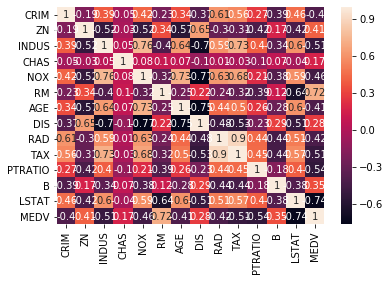

In [7]:
# Let's make it more nice in visualization by putting it into a heatmap using the seaborn function

ax = sns.heatmap(data = corr_matrix, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

- Here we want to find handful input which highly correlated to __[MEDV]__. 
- The positive and negative value mean it is a positive and negative correlation respectively.
- We found 2 possible high correlated variable which is,
- __[RM]__ with 0.72 (high positive correlation),
- __[LSTAT]__ with -0.74 (high negative correlation).
- To avoid multi-colinearity we definitely doesn't want 2 highly correlated explanatory variables to be in our model like __[TAX]__ & __[RAD]__
- __[RM]__ & __[LSTAT]__ seems fine, they don't have much correlation.

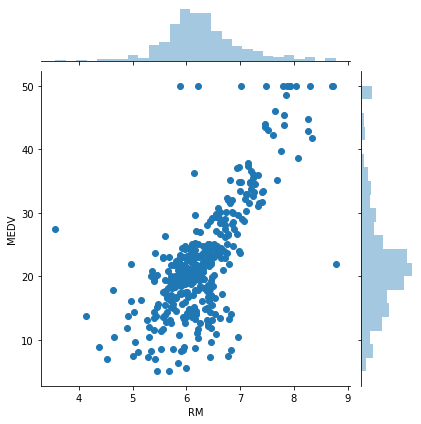

In [8]:
# distribution RM with MEDV

sns.jointplot(boston_df['RM'],boston_df['MEDV'])
plt.show()

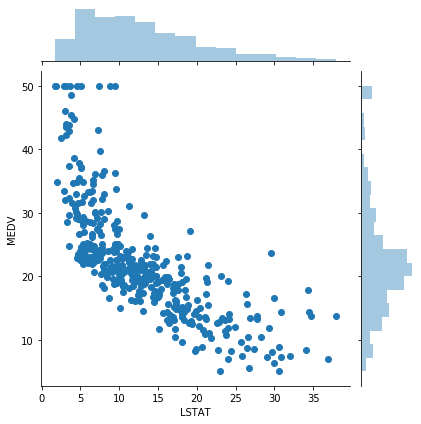

In [9]:
# distribution LSTAT with MEDV

sns.jointplot(boston_df['LSTAT'],boston_df['MEDV'])
plt.show()

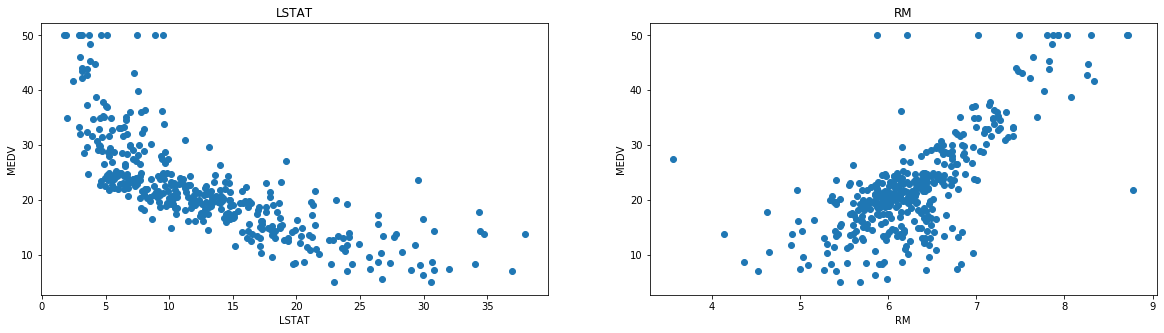

In [10]:
# For easier visualization lets plot side by side

plt.figure(figsize=(20, 5))

explanatory = ['LSTAT', 'RM']
response = boston_df['MEDV']

# i= [0,1]
# col ['LSTAT', 'RM']
for i, col in enumerate(explanatory):   
    plt.subplot(1, len(explanatory), i+1 )
    x = boston_df[col]
    y = response
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

These plot is quite convincing for linear model, so lets train this data

__Set the Train and Test dataset__

In [11]:
from sklearn import preprocessing

X = boston_df[['RM','LSTAT']].values
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[ 0.42316079, -1.06712587],
       [ 0.20224511, -0.49719648],
       [ 1.2982164 , -1.19727801],
       [ 1.02996165, -1.34661047],
       [ 0.21515576, -1.03561535]])

In [12]:
y = boston_df['MEDV'].values
y[0:5]

array([24. , 21.6, 34.7, 33.4, 28.7])

In [13]:
from sklearn.model_selection import train_test_split

# Test=20%, Train=80% with random_state=4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

__Fit & predict the model with Linear Regression__

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

nl = '\n'
lm = LinearRegression()
lm.fit(X_train, y_train)

#Let's compare the train and test prediction
y_pred_train = lm.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_train)))
r2_train = r2_score(y_train, y_pred_train)

y_pred_test = lm.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2_test = r2_score(y_test, y_pred_test)

y_pred = [y_pred_train, y_pred_test]
rmse = [rmse_train, rmse_test]
r2 = [r2_train, r2_test]
name = ['train', 'test']

for i,j,k in zip(name, rmse,r2):
    print(f"For the {i} prediction we have: {nl}RMSE: {j}{nl}R-squared: {k}{nl}")

For the train prediction we have: 
RMSE: 5.427340433961611
R-squared: 0.6479023967476796

For the test prediction we have: 
RMSE: 4.9817880366113325
R-squared: 0.6900038035365315



The R-squared not high enough, could be have something we missed. To see clearly let's se the scatter plot between the predicted and test result.

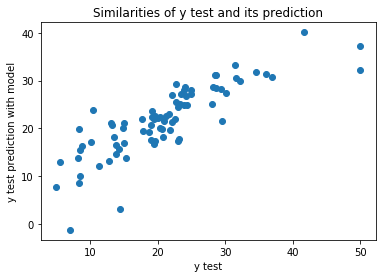

In [15]:
# Lets see the correlation

plt.scatter(y_test, y_pred_test)
plt.title('Similarities of y test and its prediction')
plt.xlabel('y test')
plt.ylabel('y test prediction with model')
plt.show()

Ideally it should be a straight line, however there are many missed position dot.

Apparently, we not fit the right model. This could be [LSTAT] shape looks like a second degree polynomial regression which should have fitted onto the polynomial model.

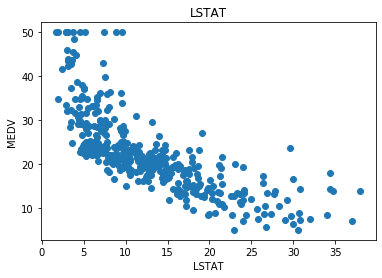

In [16]:
x = boston_df['LSTAT']
y = boston_df['MEDV']
plt.scatter(x, y, marker='o')
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

__Fit the Polynomial Regression Model__ 

In [17]:
# Create a polynomial regression function, just by inputting the n-degree

def poly_reg(n):
    
    poly = preprocessing.PolynomialFeatures(degree=n)
    
    # We will use the existing X_train, X_test and convert it to polynomial model
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    # Fit the transformed features to Linear Regression
    lm2 = LinearRegression()
    lm2.fit(X_train_poly, y_train)
    
    # Let's compare the train and test prediction
    y2_pred_train = lm2.predict(X_train_poly)
    rmse_train = (np.sqrt(mean_squared_error(y_train, y2_pred_train)))
    r2_train = r2_score(y_train, y2_pred_train)

    y2_pred_test = lm2.predict(X_test_poly)
    rmse_test = (np.sqrt(mean_squared_error(y_test, y2_pred_test)))
    r2_test = r2_score(y_test, y2_pred_test)

    y_pred = [y2_pred_train, y2_pred_test]
    rmse = [rmse_train, rmse_test]
    r2 = [r2_train, r2_test]
    name = ['train', 'test']

    for i,j,k in zip(name, rmse,r2):
        print(f"For the {i} prediction we have: {nl}RMSE: {j}{nl}R-squared: {k}{nl}")

In [18]:
poly_reg(2)

For the train prediction we have: 
RMSE: 4.45391458798709
R-squared: 0.7628775301940799

For the test prediction we have: 
RMSE: 4.095507653584235
R-squared: 0.7904916395500112



In [19]:
poly_reg(5)

For the train prediction we have: 
RMSE: 3.990009374789401
R-squared: 0.809700882954842

For the test prediction we have: 
RMSE: 3.950225715148791
R-squared: 0.8050919851680065



In [20]:
poly_reg(6)

For the train prediction we have: 
RMSE: 3.9127646808184666
R-squared: 0.8169977622696907

For the test prediction we have: 
RMSE: 6.535046537082656
R-squared: 0.4665628673930352



- The result shows **polynomial regression** yield much **better accuracy and lesser error than simple linear regression**.
- we tried 3 different n-degree polynomial, as the result we have the __best model is n=5__ with **error approximately 3.99** and **R-squared approximately 0.81**.
- When I tried using **n=6 degree polynomial**, the **R-squared test fell drastically from 0.81 to 0.47** which could have because overfitting.